# 프로젝트 진행 공간
- 데이터에 대한 전처리 과정을 포함해 주세요.
- 독립 변수 간의 여러 유의미한 관계를 시각화 해주세요.
- EDA를 통해 얻어진 인사이트를 작성해주세요.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib
from sklearn.preprocessing import StandardScaler


font_path = '/Users/hwangjunho/Desktop/encore_skn11/04_data-analysis/03_matplotlib/AppleSDGothicNeo.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

## EDA 구간

1. 데이터 로드
    - 다양한 소스에서 데이터를 로드한다. (파일, 데이터베이스, API 등에서 데이터를 불러온다.)
    - 데이터가 로드된 후에는 구조를 확인하기 위해 첫 몇 줄의 데이터를 출력해 본다.

In [22]:
import pandas as pd
import glob

# 연도별 CSV 파일 불러오기 
file_paths = glob.glob("data/*.csv")

# csv 파일 합치기
df_list = [pd.read_csv(file) for file in file_paths]
df = pd.concat(df_list, ignore_index=True)

# csv 파일 저장
df.to_csv("all.csv", index=False, encoding="utf-8")

2. 데이터 구조 및 기초 통계 확인
    - 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
    - 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
    - df.head(), df.info(), df.describe() 등의 함수를 사용한다.

In [23]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      458 non-null    object 
 1   연도      458 non-null    int64  
 2   WAR     458 non-null    float64
 3   득점      458 non-null    int64  
 4   안타      458 non-null    int64  
 5   2루타     458 non-null    int64  
 6   3루타     458 non-null    int64  
 7   홈런      458 non-null    int64  
 8   타점      458 non-null    int64  
 9   도루      406 non-null    float64
 10  볼넷      458 non-null    int64  
 11  사구      458 non-null    int64  
 12  고의사구    458 non-null    int64  
 13  삼진      458 non-null    int64  
 14  병살      458 non-null    int64  
 15  희생타     458 non-null    int64  
 16  희생플라이   458 non-null    int64  
 17  타율      458 non-null    float64
 18  출루      458 non-null    float64
 19  장타      458 non-null    float64
 20  OPS     458 non-null    float64
 21  wRC+    458 non-null    float64
 22  수상

3. 결측치 및 이상치 탐색
    - 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
    - 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
    - df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.

4. 데이터 시각화를 통한 탐색
    - 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
    - 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
    - sns.countplot(), sns.heatmap() 등의 함수를 사용한다.

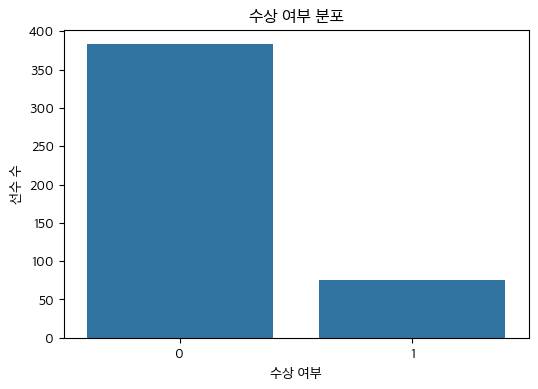

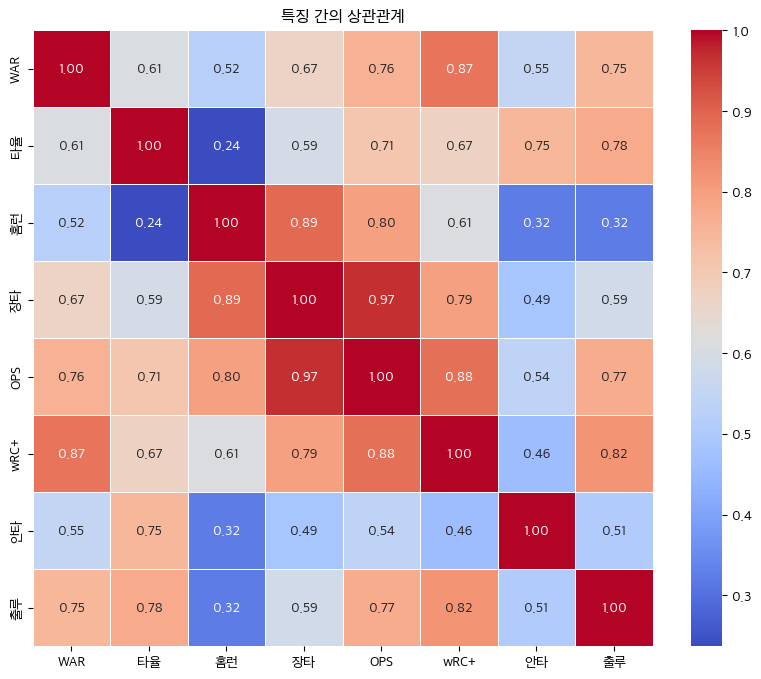

이름        0
연도        0
WAR       0
득점        0
안타        0
2루타       0
3루타       0
홈런        0
타점        0
도루       52
볼넷        0
사구        0
고의사구      0
삼진        0
병살        0
희생타       0
희생플라이     0
타율        0
출루        0
장타        0
OPS       0
wRC+      0
수상여부      0
dtype: int64


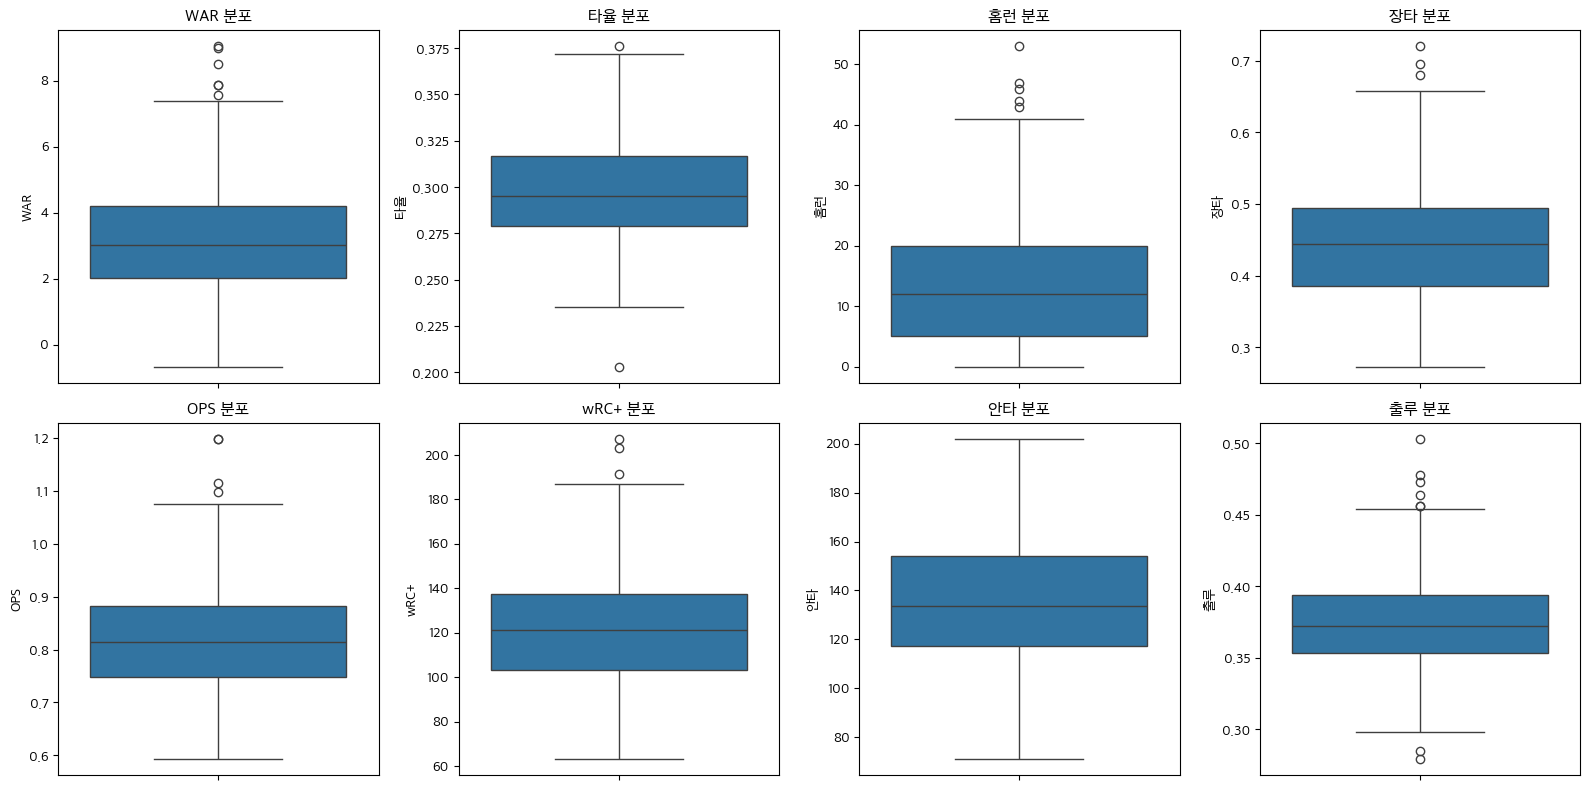

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['수상여부'])
plt.title("수상 여부 분포")
plt.xlabel("수상 여부")
plt.ylabel("선수 수")
plt.show()

selected_features = ['WAR', '타율', '홈런', '장타', 'OPS', 'wRC+', '안타', '출루']

plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("특징 간의 상관관계")
plt.show()



print(df.isnull().sum())

# 그래프 생성
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(f'{feature} 분포')

plt.tight_layout()
plt.show()





도루 : 평균값으로 채워넣는다.

이상치 : 선수의 뛰어난 성과를 반영하는 경우가 많아, 데이터의 의미를 보존하기 위해 제거하지 않고 유지

5. 데이터 정제 및 전처리
    - 필요 없는 변수나 중복 데이터를 제거한다.
    - 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다. 
    - df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 활용한다.

In [77]:
df_new = df.drop(columns=['이름', '득점', '2루타', '3루타', '타점', '도루', '볼넷', '사구', '고의사구', '삼진', '병살', '희생타', '희생플라이'])
df_avg = pd.read_csv('yearly_averages.csv')

display(df_new)

merged = pd.merge(df_new, df_avg, on="연도", suffixes=('_all', '_avg'))

display(merged)

columns_to_subtract = ['WAR', '타율', '홈런', '장타', 'OPS', 'wRC+', '안타', '출루']

for col in columns_to_subtract:
    merged[f'{col}'] = merged[f'{col}_all'] - merged[f'{col}_avg']

# 차이값만 모은 DataFrame 생성
df_diff = merged[['연도'] + [f'{col}' for col in columns_to_subtract]+['수상여부']]



df_diff = df_diff.drop(columns=['연도'])
# 결과 확인
display(df_diff)

X = df_diff.drop(columns=['수상여부'])

y = df_diff['수상여부']

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


display(X_scaled, y)

,연도,WAR,안타,홈런,타율,출루,장타,OPS,wRC+,수상여부
0,2008,7.20,168,9,0.357,0.454,0.509,0.963,191.3,1
1,2008,5.27,117,4,0.316,0.414,0.405,0.819,147.1,0
2,2008,5.24,130,0,0.312,0.385,0.398,0.783,133.4,0
3,2008,4.82,116,22,0.246,0.338,0.451,0.789,112.2,0
4,2008,4.80,126,19,0.318,0.420,0.538,0.958,178.2,0
...,...,...,...,...,...,...,...,...,...,...
453,2005,1.84,110,5,0.266,0.340,0.353,0.693,92.6,0
454,2005,1.71,121,3,0.286,0.361,0.345,0.706,101.2,0
455,2005,1.34,100,0,0.273,0.344,0.339,0.683,82.8,0
456,2005,0.99,88,6,0.240,0.322,0.346,0.668,83.9,0


,연도,WAR_all,안타_all,홈런_all,타율_all,출루_all,장타_all,OPS_all,wRC+_all,수상여부,WAR_avg,타율_avg,홈런_avg,장타_avg,OPS_avg,wRC+_avg,안타_avg,출루_avg
0,2008,7.20,168,9,0.357,0.454,0.509,0.963,191.3,1,3.685,0.296,8.667,0.420,0.793,126.793,122.467,0.373
1,2008,5.27,117,4,0.316,0.414,0.405,0.819,147.1,0,3.685,0.296,8.667,0.420,0.793,126.793,122.467,0.373
2,2008,5.24,130,0,0.312,0.385,0.398,0.783,133.4,0,3.685,0.296,8.667,0.420,0.793,126.793,122.467,0.373
3,2008,4.82,116,22,0.246,0.338,0.451,0.789,112.2,0,3.685,0.296,8.667,0.420,0.793,126.793,122.467,0.373
4,2008,4.80,126,19,0.318,0.420,0.538,0.958,178.2,0,3.685,0.296,8.667,0.420,0.793,126.793,122.467,0.373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2005,1.84,110,5,0.266,0.340,0.353,0.693,92.6,0,3.408,0.291,13.105,0.438,0.809,125.042,120.632,0.372
454,2005,1.71,121,3,0.286,0.361,0.345,0.706,101.2,0,3.408,0.291,13.105,0.438,0.809,125.042,120.632,0.372
455,2005,1.34,100,0,0.273,0.344,0.339,0.683,82.8,0,3.408,0.291,13.105,0.438,0.809,125.042,120.632,0.372
456,2005,0.99,88,6,0.240,0.322,0.346,0.668,83.9,0,3.408,0.291,13.105,0.438,0.809,125.042,120.632,0.372


,WAR,타율,홈런,장타,OPS,wRC+,안타,출루,수상여부
0,3.515,0.061,0.333,0.089,0.170,64.507,45.533,0.081,1
1,1.585,0.020,-4.667,-0.015,0.026,20.307,-5.467,0.041,0
2,1.555,0.016,-8.667,-0.022,-0.010,6.607,7.533,0.012,0
3,1.135,-0.050,13.333,0.031,-0.004,-14.593,-6.467,-0.035,0
4,1.115,0.022,10.333,0.118,0.165,51.407,3.533,0.047,0
...,...,...,...,...,...,...,...,...,...
453,-1.568,-0.025,-8.105,-0.085,-0.116,-32.442,-10.632,-0.032,0
454,-1.698,-0.005,-10.105,-0.093,-0.103,-23.842,0.368,-0.011,0
455,-2.068,-0.018,-13.105,-0.099,-0.126,-42.242,-20.632,-0.028,0
456,-2.418,-0.051,-7.105,-0.092,-0.141,-41.142,-32.632,-0.050,0


array([[ 2.13708434,  2.35393678,  0.03603726, ...,  2.57069669,
         2.16215209,  2.70220017],
       [ 0.96365226,  0.77047897, -0.5050166 , ...,  0.80926422,
        -0.25959587,  1.36691649],
       [ 0.94541238,  0.61599528, -0.93785969, ...,  0.26329985,
         0.35771243,  0.39883582],
       ...,
       [-1.25735676, -0.69711608, -1.41809909, ..., -1.68340184,
        -0.97970975, -0.93644785],
       [-1.47015532, -1.97160651, -0.76883446, ..., -1.63956528,
        -1.5495328 , -1.67085388],
       [ 2.0987806 ,  0.03668144,  2.36927792, ...,  1.82352254,
         0.15993635,  1.30015231]], shape=(458, 8))

0      1
1      0
2      0
3      0
4      0
      ..
453    0
454    0
455    0
456    0
457    1
Name: 수상여부, Length: 458, dtype: int64

## 학습 구간(knn)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# 모델 정의 및 학습
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print("정확도:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


정확도: 0.8956521739130435
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        93
           1       0.71      0.77      0.74        22

    accuracy                           0.90       115
   macro avg       0.83      0.85      0.84       115
weighted avg       0.90      0.90      0.90       115

